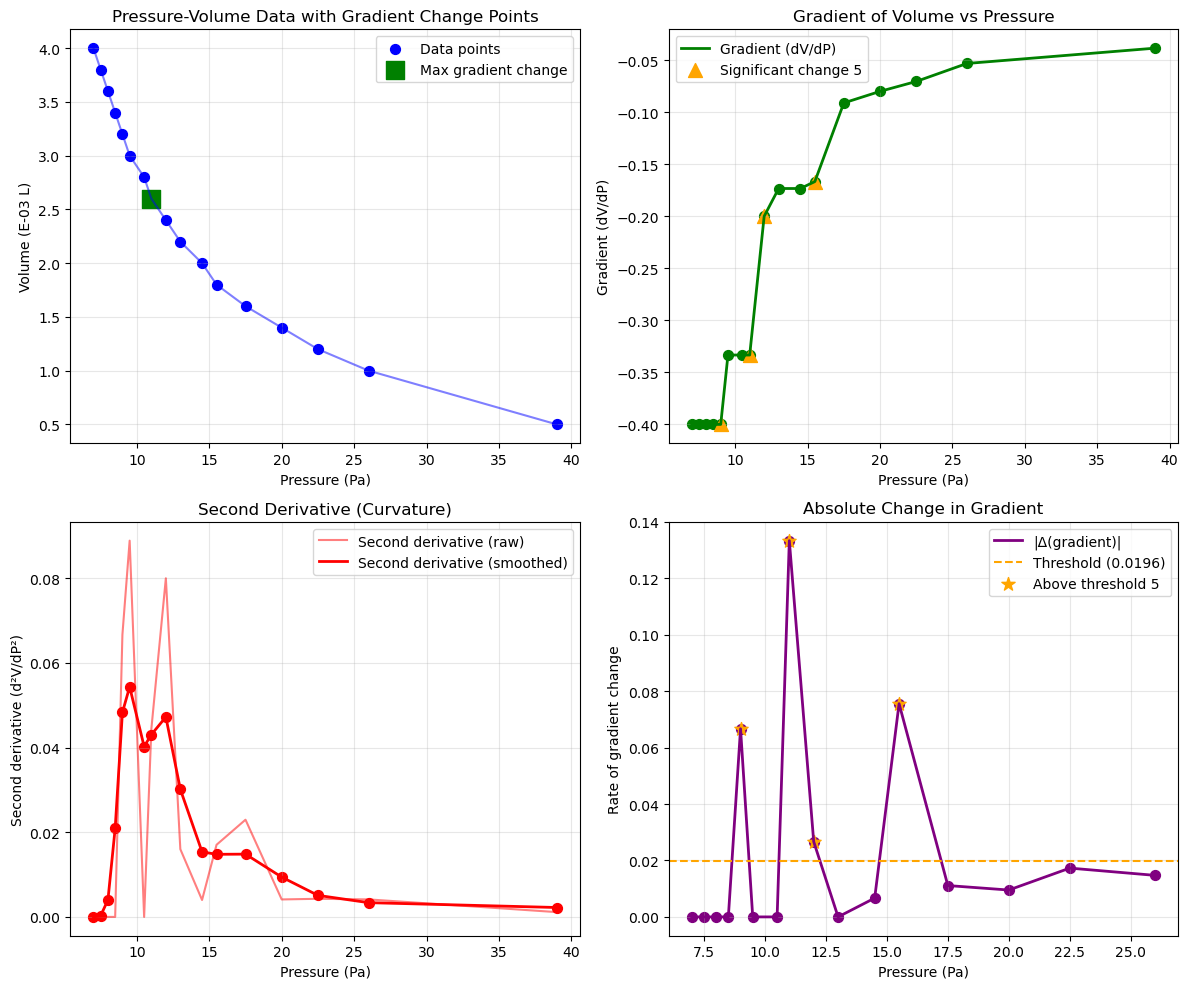

GRADIENT CHANGE ANALYSIS

1. Data points: 17
   Pressure range: 7.0 to 39.0 Pa
   Volume range: 4.0 to 0.5 (E-03 L)

2. Gradient statistics:
   Mean gradient: -0.2380
   Std of gradient: 0.1376
   Min gradient: -0.4000 at P=7.0 Pa
   Max gradient: -0.0385 at P=39.0 Pa

4. Maximum gradient change occurs between:
   Points 7 and 8
   At P=11.0 to 12.0 Pa
   Gradient change magnitude: 0.1333

5. Significant gradient changes (above 75th percentile):
   Change 1: Between points 4 and 5
     Pressure: 9.0 to 9.5 Pa
     Gradient change: 0.0667
     Volume change per pressure: -0.4000 to -0.3333
   Change 2: Between points 7 and 8
     Pressure: 11.0 to 12.0 Pa
     Gradient change: 0.1333
     Volume change per pressure: -0.3333 to -0.2000
   Change 3: Between points 8 and 9
     Pressure: 12.0 to 13.0 Pa
     Gradient change: 0.0267
     Volume change per pressure: -0.2000 to -0.1733
   Change 4: Between points 11 and 12
     Pressure: 15.5 to 17.5 Pa
     Gradient change: 0.0756
     Volum

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from scipy.ndimage import gaussian_filter1d

# Your data
pressure = np.array([7, 7.5, 8, 8.5, 9, 9.5, 10.5, 11, 12, 13, 14.5, 15.5, 17.5, 20, 22.5, 26, 39])
volume = np.array([4, 3.8, 3.6, 3.4, 3.2, 3, 2.8, 2.6, 2.4, 2.2, 2, 1.8, 1.6, 1.4, 1.2, 1, 0.5])

# Since volume has E-03 notation in the header, multiply by 1e-3 if needed
# Based on the values, it looks like volume is already in the correct scale (4, 3.8, etc.)
# So we'll keep it as is

# Calculate gradients (first derivative)
volume_gradient = np.gradient(volume, pressure)

# Calculate second derivative to find inflection points
second_derivative = np.gradient(volume_gradient, pressure)

# Smooth the second derivative to reduce noise
second_derivative_smooth = gaussian_filter1d(second_derivative, sigma=1)

# Find points where second derivative changes sign (inflection points)
inflection_indices = np.where(np.diff(np.sign(second_derivative_smooth)))[0]

# Find the point with maximum gradient change
max_gradient_change_idx = np.argmax(np.abs(np.diff(volume_gradient)))

# Alternative approach: Find points where gradient changes significantly
gradient_diff = np.abs(np.diff(volume_gradient))
significant_change_indices = np.where(gradient_diff > np.percentile(gradient_diff, 75))[0]

# Create the plot
plt.figure(figsize=(12, 10))

# Plot 1: Original data with gradient change points
plt.subplot(2, 2, 1)
plt.scatter(pressure, volume, color='blue', s=50, label='Data points')
plt.plot(pressure, volume, 'b-', alpha=0.5)

# Mark inflection points
if len(inflection_indices) > 0:
    for idx in inflection_indices:
        plt.scatter(pressure[idx], volume[idx], color='red', s=100, marker='o', 
                   label=f'Inflection point {idx+1}' if idx == inflection_indices[0] else "")
        
# Mark point of maximum gradient change
plt.scatter(pressure[max_gradient_change_idx], volume[max_gradient_change_idx], 
           color='green', s=150, marker='s', label='Max gradient change')

plt.xlabel('Pressure (Pa)')
plt.ylabel('Volume (E-03 L)')
plt.title('Pressure-Volume Data with Gradient Change Points')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot 2: Gradient (first derivative)
plt.subplot(2, 2, 2)
plt.plot(pressure, volume_gradient, 'g-', linewidth=2, label='Gradient (dV/dP)')
plt.scatter(pressure, volume_gradient, color='green', s=50)

# Mark significant changes
if len(significant_change_indices) > 0:
    for idx in significant_change_indices:
        plt.scatter(pressure[idx], volume_gradient[idx], color='orange', s=100, marker='^',
                   label=f'Significant change {idx+1}' if idx == significant_change_indices[0] else "")

plt.xlabel('Pressure (Pa)')
plt.ylabel('Gradient (dV/dP)')
plt.title('Gradient of Volume vs Pressure')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot 3: Second derivative
plt.subplot(2, 2, 3)
plt.plot(pressure, second_derivative, 'r-', alpha=0.5, label='Second derivative (raw)')
plt.plot(pressure, second_derivative_smooth, 'r-', linewidth=2, label='Second derivative (smoothed)')
plt.scatter(pressure, second_derivative_smooth, color='red', s=50)

# Mark zero crossings (inflection points)
zero_crossings = np.where(np.diff(np.sign(second_derivative_smooth)))[0]
for idx in zero_crossings:
    plt.axvline(x=pressure[idx], color='gray', linestyle='--', alpha=0.5)

plt.xlabel('Pressure (Pa)')
plt.ylabel('Second derivative (d²V/dP²)')
plt.title('Second Derivative (Curvature)')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot 4: Rate of gradient change
plt.subplot(2, 2, 4)
plt.plot(pressure[:-1], gradient_diff, 'purple', linewidth=2, label='|Δ(gradient)|')
plt.scatter(pressure[:-1], gradient_diff, color='purple', s=50)

# Mark points above threshold
threshold = np.percentile(gradient_diff, 75)
plt.axhline(y=threshold, color='orange', linestyle='--', label=f'Threshold ({threshold:.4f})')

for idx in significant_change_indices:
    plt.scatter(pressure[idx], gradient_diff[idx], color='orange', s=100, marker='*',
               label=f'Above threshold {idx+1}' if idx == significant_change_indices[0] else "")

plt.xlabel('Pressure (Pa)')
plt.ylabel('Rate of gradient change')
plt.title('Absolute Change in Gradient')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print detailed analysis
print("=" * 60)
print("GRADIENT CHANGE ANALYSIS")
print("=" * 60)

print(f"\n1. Data points: {len(pressure)}")
print(f"   Pressure range: {pressure[0]} to {pressure[-1]} Pa")
print(f"   Volume range: {volume[0]} to {volume[-1]} (E-03 L)")

print(f"\n2. Gradient statistics:")
print(f"   Mean gradient: {np.mean(volume_gradient):.4f}")
print(f"   Std of gradient: {np.std(volume_gradient):.4f}")
print(f"   Min gradient: {np.min(volume_gradient):.4f} at P={pressure[np.argmin(volume_gradient)]} Pa")
print(f"   Max gradient: {np.max(volume_gradient):.4f} at P={pressure[np.argmax(volume_gradient)]} Pa")

if len(inflection_indices) > 0:
    print(f"\n3. Inflection points (where curvature changes sign):")
    for i, idx in enumerate(inflection_indices):
        print(f"   Point {i+1}: P={pressure[idx]:.1f} Pa, V={volume[idx]:.1f} (E-03 L)")

print(f"\n4. Maximum gradient change occurs between:")
print(f"   Points {max_gradient_change_idx} and {max_gradient_change_idx+1}")
print(f"   At P={pressure[max_gradient_change_idx]:.1f} to {pressure[max_gradient_change_idx+1]:.1f} Pa")
print(f"   Gradient change magnitude: {gradient_diff[max_gradient_change_idx]:.4f}")

if len(significant_change_indices) > 0:
    print(f"\n5. Significant gradient changes (above 75th percentile):")
    for i, idx in enumerate(significant_change_indices):
        print(f"   Change {i+1}: Between points {idx} and {idx+1}")
        print(f"     Pressure: {pressure[idx]:.1f} to {pressure[idx+1]:.1f} Pa")
        print(f"     Gradient change: {gradient_diff[idx]:.4f}")
        print(f"     Volume change per pressure: {volume_gradient[idx]:.4f} to {volume_gradient[idx+1]:.4f}")

# Find the elbow point using the maximum curvature method
if len(pressure) > 2:
    # Normalize data
    p_norm = (pressure - pressure.min()) / (pressure.max() - pressure.min())
    v_norm = (volume - volume.min()) / (volume.max() - volume.min())
    
    # Calculate distance from each point to line connecting first and last points
    distances = []
    for i in range(len(pressure)):
        # Distance from point to line between first and last point
        numerator = abs((v_norm[-1]-v_norm[0])*p_norm[i] - (p_norm[-1]-p_norm[0])*v_norm[i] + p_norm[-1]*v_norm[0] - v_norm[-1]*p_norm[0])
        denominator = np.sqrt((v_norm[-1]-v_norm[0])**2 + (p_norm[-1]-p_norm[0])**2)
        distances.append(numerator/denominator if denominator != 0 else 0)
    
    elbow_idx = np.argmax(distances)
    print(f"\n6. Elbow point (maximum curvature method):")
    print(f"   Point {elbow_idx}: P={pressure[elbow_idx]:.1f} Pa, V={volume[elbow_idx]:.1f} (E-03 L)")
    print(f"   This is likely where the relationship changes most significantly")